In [2]:
from igraph import Graph
import numpy as np
import itertools

edges = [
	("2", "1"),
	("3", "1"),
	("4", "1"),
	("5", "1"),
	("6", "1"),
	("7", "1"),
	("8", "1"),
	("9", "1"),
	("11", "1"),
	("12", "1"),
	("13", "1"),
	("14", "1"),
	("18", "1"),
	("20", "1"),
	("22", "1"),
	("32", "1"),
	("3", "2"),
	("4", "2"),
	("8", "2"),
	("14", "2"),
	("18", "2"),
	("20", "2"),
	("22", "2"),
	("31", "2"),
	("4", "3"),
	("8", "3"),
	("9", "3"),
	("10", "3"),
	("14", "3"),
	("28", "3"),
	("29", "3"),
	("33", "3"),
	("8", "4"),
	("13", "4"),
	("14", "4"),
	("7", "5"),
	("11", "5"),
	("7", "6"),
	("11", "6"),
	("17", "6"),
	("17", "7"),
	("31", "9"),
	("33", "9"),
	("34", "9"),
	("34", "10"),
	("34", "14"),
	("33", "15"),
	("34", "15"),
	("33", "16"),
	("34", "16"),
	("33", "19"),
	("34", "19"),
	("34", "20"),
	("33", "21"),
	("34", "21"),
	("33", "23"),
	("34", "23"),
	("26", "24"),
	("28", "24"),
	("30", "24"),
	("33", "24"),
	("34", "24"),
	("26", "25"),
	("28", "25"),
	("32", "25"),
	("32", "26"),
	("30", "27"),
	("34", "27"),
	("34", "28"),
	("32", "29"),
	("34", "29"),
	("33", "30"),
	("34", "30"),
	("33", "31"),
	("34", "31"),
	("33", "32"),
	("34", "32"),
	("34", "33"),
]

vertices = sorted(set([v for edge in edges for v in edge]))

# Cria um grafo com igraph iniciando no 1
g = Graph()
g.add_vertices(vertices)
g.add_edges(edges)

g.vs["label"] = g.vs["name"]
g.write_svg("graph.svg")

In [7]:
import matplotlib.pyplot as plt
from igraph import RainbowPalette, plot

In [13]:
#  community_edge_betweenness

communities_edge_betweenness = g.community_edge_betweenness(directed=False, weights=None).as_clustering()


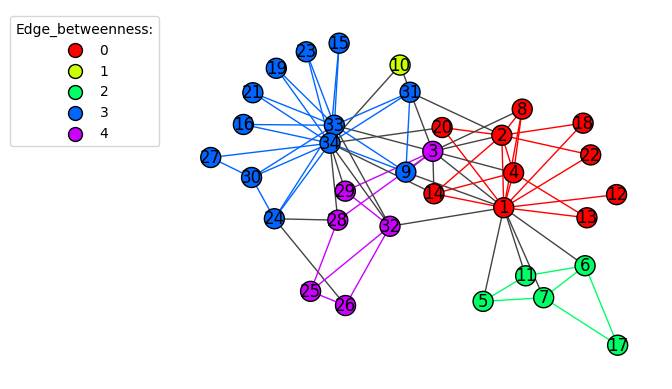

In [ ]:
num_communities_edge_betweenness = len(communities_edge_betweenness)
palette = RainbowPalette(n=num_communities_edge_betweenness)
for i, community in enumerate(communities_edge_betweenness):
	g.vs[community]["color"] = i
	community_edges = g.es.select(_within=community)
	community_edges["color"] = i

fig, ax = plt.subplots()
plot(
	communities_edge_betweenness,
	palette=palette,
	edge_width=1,
	target=ax,
	vertex_size=20,
)

# Create a custom color legend
legend_handles = []
for i in range(num_communities_edge_betweenness):
	handle = ax.scatter(
		[], [],
		s=100,
		facecolor=palette.get(i),
		edgecolor="k",
		label=i,
	)
	legend_handles.append(handle)
ax.legend(
	handles=legend_handles,
	title='Edge_betweenness:',
	bbox_to_anchor=(0, 1.0),
	bbox_transform=ax.transAxes,
)
plt.show()

In [18]:
# Community leiden

communities_leiden = g.community_leiden(n_iterations=10, resolution=0.1)


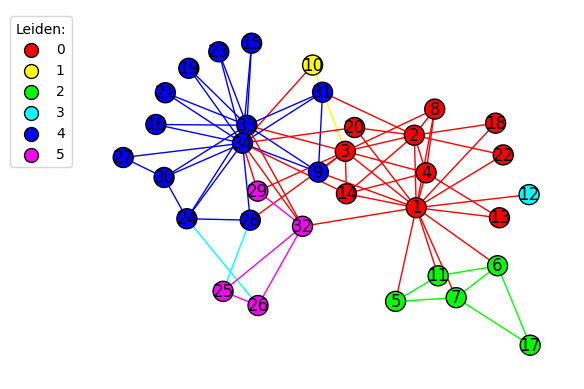

In [19]:

num_communities_leiden = len(communities_leiden)
palette = RainbowPalette(n=num_communities_leiden)
for i, community in enumerate(communities_leiden):
	g.vs[community]["color"] = i
	community_edges = g.es.select(_within=community)
	community_edges["color"] = i

fig, ax = plt.subplots()
plot(
	communities_leiden,
	palette=palette,
	edge_width=1,
	target=ax,
	vertex_size=20,
)
# Create a custom color legend
legend_handles = []
for i in range(num_communities_leiden):
	handle = ax.scatter(
		[], [],
		s=100,
		facecolor=palette.get(i),
		edgecolor="k",
		label=i,
	)
	legend_handles.append(handle)
ax.legend(
	handles=legend_handles,
	title='Leiden:',
	bbox_to_anchor=(0, 1.0),
	bbox_transform=ax.transAxes,
)
plt.show()

In [14]:
# Multilevel
communities_multilevel = g.community_multilevel()

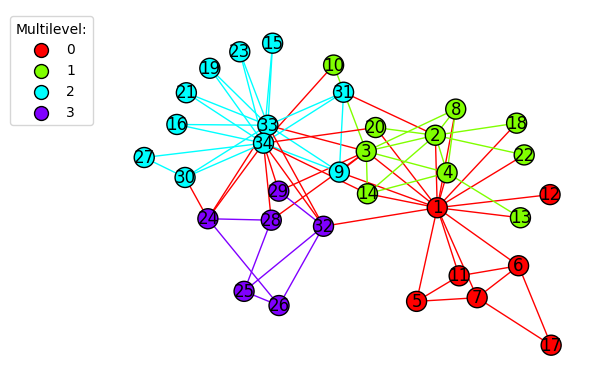

In [15]:
num_communities_multilevel = len(communities_multilevel)
palette = RainbowPalette(n=num_communities_multilevel)
for i, community in enumerate(communities_multilevel):
	g.vs[community]["color"] = i
	community_edges = g.es.select(_within=community)
	community_edges["color"] = i

fig, ax = plt.subplots()
plot(
	communities_multilevel,
	palette=palette,
	edge_width=1,
	target=ax,
	vertex_size=20,
)
# Create a custom color legend
legend_handles = []
for i in range(num_communities_multilevel):
	handle = ax.scatter(
		[], [],
		s=100,
		facecolor=palette.get(i),
		edgecolor="k",
		label=i,
	)
	legend_handles.append(handle)
ax.legend(
	handles=legend_handles,
	title='Multilevel:',
	bbox_to_anchor=(0, 1.0),
	bbox_transform=ax.transAxes,
)
plt.show()